This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

# Step 1: Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Let's go over the columns:
1. age
2. sex = 1: male; 0: female
3. cp = chest pain type
4. trestbps = resting blood pressure (in mm Hg on admission to the hospital)
5. chol = serum cholestoral in mg/dl
6. fbs = fasting blood sugar > 120 mg/dl, 1: true; 0: false
7. restecg = resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. thalach = maximum heart rate achieved
9. exang = exercise induced angina, 1:yes; 0: no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope = the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping 
12. ca = number of major vessels (0-3) colored by flourosopy
13. thal= 0: normal; 1:fixed defect; 2:reversable defect

# Step 2: Getting to know the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


You can see all the values are int and float.

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no missing values in this dataset!

In [6]:
df.shape

(1025, 14)

1025 data are available in this dataset.

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


# Step 3: Exploratory data analysis

Let's look at the effect of each parameter on having a heart disease:

([<matplotlib.patches.Wedge at 0x7f6336515990>,
 [Text(-0.06825262763640201, 1.6485877528420279, 'Sick'),
  Text(0.06825262763640144, -1.6485877528420279, 'Healthy')],
 [Text(-0.037228705983492004, 0.8992296833683786, '51.3%'),
  Text(0.03722870598349169, -0.8992296833683786, '48.7%')])

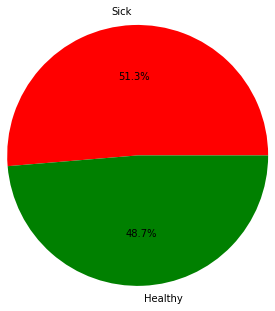

In [9]:
plt.pie( df['target'].value_counts(),  labels = ['Sick','Healthy'],  colors = ['red', 'green'],  autopct = '%1.1f%%', radius = 1.5)


We can see that half of the people in this study had heart disease.

# A. Age and sex

([<matplotlib.patches.Wedge at 0x7f6336482210>,
 [Text(-0.9513428564398835, 1.3481271340273526, 'Male'),
  Text(0.9513428564398827, -1.348127134027353, 'Female')],
 [Text(-0.5189142853308454, 0.7353420731058286, '69.6%'),
  Text(0.518914285330845, -0.7353420731058289, '30.4%')])

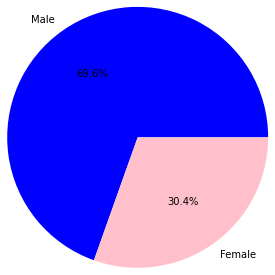

In [10]:
plt.pie( df['sex'].value_counts(),  labels=['Male', 'Female'],  colors = ['blue', 'pink'],  autopct = '%1.1f%%',  radius = 1.5)

We can see that 30% of people were female and 70% were male.

<AxesSubplot:xlabel='age', ylabel='Count'>

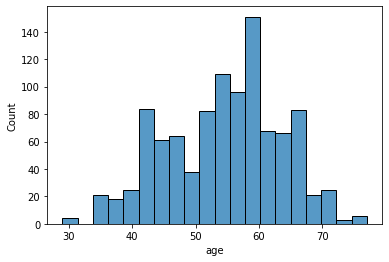

In [11]:
sns.histplot( df['age'],  bins = 20 )

We can see that most of the people in this study had age 50-60.

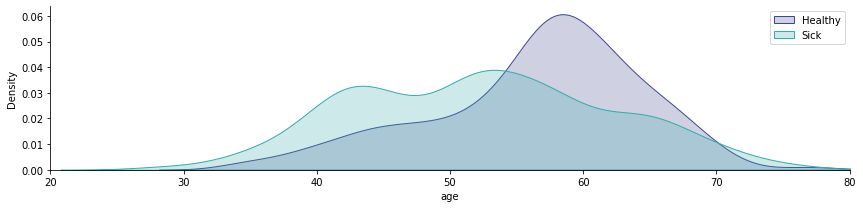

In [12]:
fig = sns.FacetGrid( df, hue = "target",  aspect = 4,  palette = 'mako' )

fig.map( sns.kdeplot,  'age',  shade = True )

fig.set( xlim = (20, 80) )

plt.legend( labels = ['Healthy' , 'Sick'] )

We can see that most of the people show their heart disease between age 40-60. Also, we see a peak of healthy people at 60. Let's see if age is a factor in heart disease:

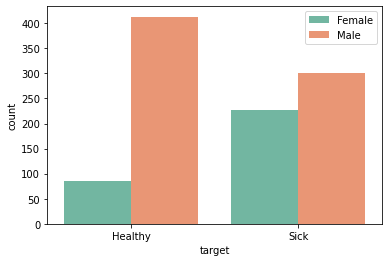

In [13]:
fig = sns.countplot(  x = 'target',  data = df,  hue = 'sex',  palette = 'Set2' )

fig.set_xticklabels(  labels = ['Healthy', 'Sick'] )

plt.legend( ['Female', 'Male'] )

We can see that there are more man in this study, so both healthy and sick male are more than females. 

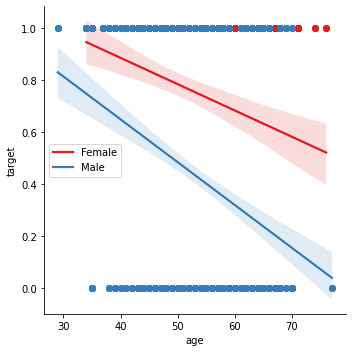

In [14]:
sns.lmplot (x = 'age',  y = 'target',  data = df,  hue = 'sex',  legend = False,  palette = 'Set1' )

plt.legend( ['Female', 'Male'] )

We can see that women tend to have more heart disease. Also, the more you get old, the less you have heart disease! (This sentence does not seem to be correct scientifically.)

# B. Chest pain type

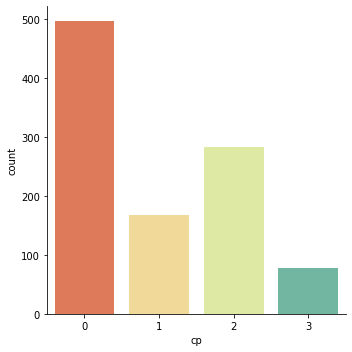

In [15]:
sns.catplot( x = 'cp',  data = df,  kind = "count",  palette = 'Spectral'  )

We can see the chest pain type 0 is more common between people.

[Text(0, 0, 'pain type 0'),
 Text(1, 0, 'pain type 1'),
 Text(2, 0, 'pain type 2'),
 Text(3, 0, 'pain type 3')]

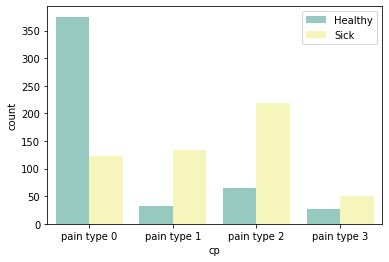

In [16]:
fig = sns.countplot( x = 'cp', data = df,  hue = 'target', palette = 'Set3')

plt.legend( ['Healthy', 'Sick'] )

fig.set_xticklabels(  labels = [ 'pain type 0', 'pain type 1',  'pain type 2', 'pain type 3' ]  )

It seems that people with chest pain type 0 are less likely to have a serious problem. Chest pain type 2 seems more serious though.

# C. Resting blood pressure

"trestbps" is resting blood pressure (in mm Hg on admission to the hospital). Normal resting blood pressure, in an adult is approximately 120 millimetres of mercury .

[Text(0.5, 0, 'resting blood pressure')]

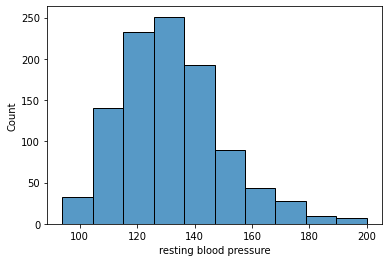

In [17]:
fig = sns.histplot( df['trestbps'],  bins = 10 )

fig.set( xlabel = 'resting blood pressure' )

The blood pressure of the poeple in this study is between 120-130. Let's see if this is related to their health condition:

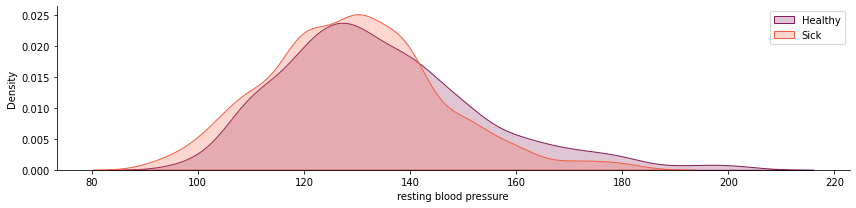

In [18]:
fig = sns.FacetGrid( df,  hue="target",  aspect = 4,   palette = 'rocket'  )

fig.map(  sns.kdeplot,  'trestbps',  shade = True  )

plt.legend(  labels = ['Healthy' , 'Sick']  )

fig.set(  xlabel = 'resting blood pressure'  )

It seems that people with heart problems generally had slighly lower blood pressure than normal people.

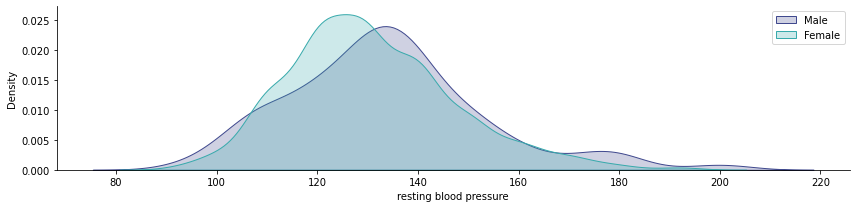

In [19]:
fig = sns.FacetGrid( df, hue = "sex",  aspect = 4,  palette = 'mako' )

fig.map(  sns.kdeplot,  'trestbps',  shade = True  )

plt.legend(  labels = ['Male' , 'Female'] )

fig.set( xlabel = 'resting blood pressure' )

Women have lower resting blood pressure comparing to men. For women is around 120 while for men is a little less than 140.

# D. Serum cholestoral

chol or serum cholestoral in mg/dl is measured in all people. Healthy serum cholesterol is less than 200 mg/dL.

[Text(0.5, 0, 'serum cholestrol')]

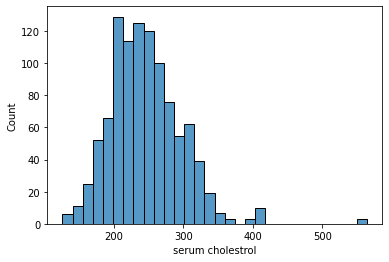

In [20]:
fig = sns.histplot( df['chol'],  bins = 30 )

fig.set(  xlabel = 'serum cholestrol'   )

As expected, serum cholestrol is between 200-300 in this study.

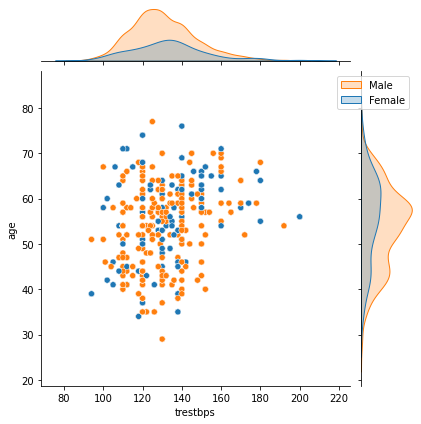

In [21]:
sns.jointplot( data = df,   x = 'trestbps',   y = 'age',  hue = 'sex',  kind = 'scatter',   legend = False )

plt.legend(  labels = ['Male' , 'Female'] )

In both women and men we can see that blood pressure increases with age.

# E. Fasting blood sugar

fbs or fasting blood sugar should be less than 120 mg/dl. 1: true; 0: false

[Text(0, 0, 'low blood sugar'), Text(1, 0, 'high blood sugar')]

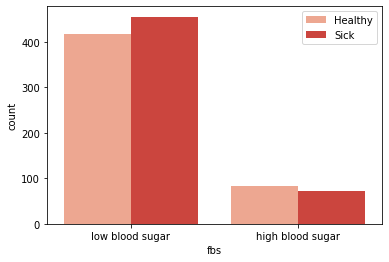

In [22]:
fig = sns.countplot( x = 'fbs',  data = df,  hue = 'target',  palette = 'Reds' )

plt.legend( ['Healthy', 'Sick'] )

fig.set_xticklabels( labels = [ 'low blood sugar', 'high blood sugar'] )

We see that most of the healthy and sick people have blood sugar less than 120. Few people have higher blood sugar, but it may not be the reason they are sick.

# F. Resting electrocardiographic results

Resting electrocardiographic results can have 0,1 and 2 value:

Value 0: normal, 
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

[Text(0, 0, 'value 0'), Text(1, 0, 'value 1'), Text(2, 0, 'value 2')]

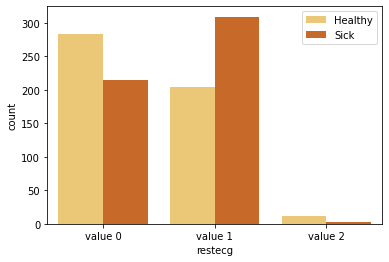

In [23]:
fig = sns.countplot( x = 'restecg', data = df,  hue = 'target', palette = 'YlOrBr' )

plt.legend( ['Healthy', 'Sick'] )

fig.set_xticklabels( labels = [ 'value 0', 'value 1',  'value 2'] )

It seems that value 2 is kind of rare result. Also, value 1 seems to be more dangerous as a lot of sick people have that.

# G. Maximum heart rate achieved

thalach or maximum heart rate achieved histogram is below:

[Text(0.5, 0, 'maximum heart rate achieved')]

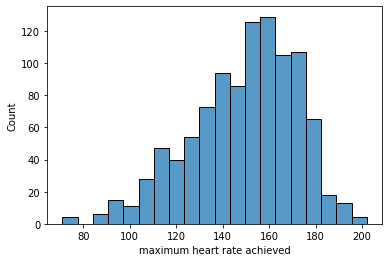

In [24]:
fig = sns.histplot( df[  'thalach'],  bins = 20 )

fig.set(  xlabel = 'maximum heart rate achieved' )

The maximum heart rate achieved seems to be between 150 - 170.

[Text(0, 0, 'healthy'), Text(1, 0, 'sick')]

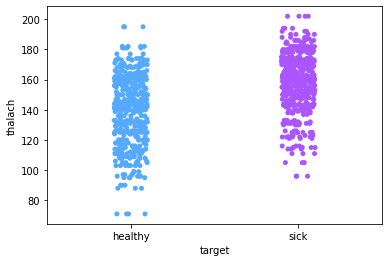

In [25]:
fig = sns.stripplot( data = df,  x = 'target',   y = 'thalach',  palette = 'cool'  )

fig.set_xticklabels(  labels = [ 'healthy', 'sick']  )

Sick people seem to have higher maximum heart rate values.

# H. Exercise induced angina

exang or exercise induced angina is a feeling like pressure in the chest, jaw or arm. It frequently may occur with exercise or stress. 

[Text(0, 0, 'no angina'), Text(1, 0, 'with angina')]

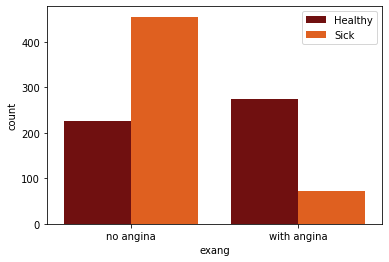

In [26]:
fig = sns.countplot(  x = 'exang',  data = df,   hue = 'target',  palette = 'gist_heat'  )

plt.legend(  ['Healthy',  'Sick'] )

fig.set_xticklabels(  labels = [ 'no angina',  'with angina'] )

We can see that many healthy people have exercise induced angina, while many sick people do not have it. So this might not be a sign of heart disease. 

# I. Oldpeak (ST depression)

Electrocardiography is the process of producing an electrocardiogram. It is a graph of voltage versus time of the electrical activity of the heart using electrodes placed on the skin. ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline. 

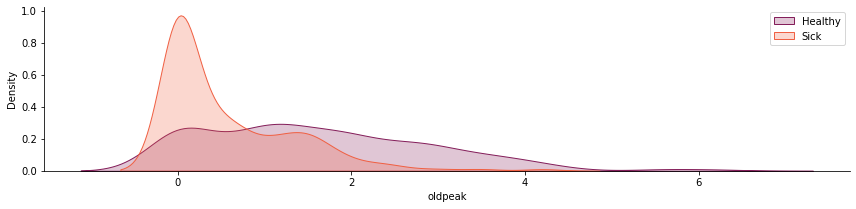

In [27]:
fig = sns.FacetGrid( df,  hue = "target",  aspect = 4,  palette = 'rocket'  )

fig.map(  sns.kdeplot,  'oldpeak',  shade = True  )

plt.legend(  labels = ['Healthy' , 'Sick']  )

We can clearly see that in sick people we have a pick around 0. This can be a good indicator for this heart disease.

# J. Slope of the peak exercise ST segment

The slope of the peak exercise ST segment can have 3 values:

Value 1: upsloping, Value 2: flat, Value 3: downsloping

[Text(0, 0, 'value 1'), Text(1, 0, 'value 2'), Text(2, 0, 'value 3')]

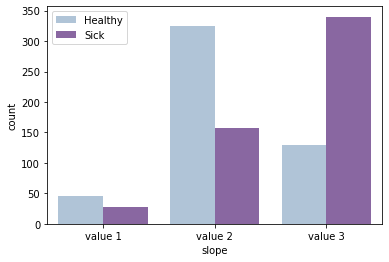

In [28]:
fig = sns.countplot(  x = 'slope',  data = df,  hue = 'target',  palette = 'BuPu'  )

plt.legend(  ['Healthy', 'Sick'] )

fig.set_xticklabels(  labels = [ 'value 1',  'value 2',  'value 3']  )

We can see that value 1 (unsloping) is somehow rare. While many healthy people have the value 2 (flat), many sick people have the value 3 (downsloping). So this should be taken more seriously.

# K. Number of major vessels colored by flourosopy

ca or number of major vessels (0-3) colored by flourosopy can be 0 to 3.

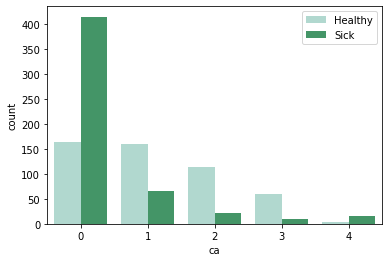

In [29]:
fig = sns.countplot(  x = 'ca',  data = df, hue = 'target', palette = 'BuGn' )

plt.legend(  ['Healthy', 'Sick'] )

We can see that in sick people there are many people with 0 major vessels colored by flourosopy. So this is also should be taken into account.

# L. Thalassemia

A blood disorder called thalassemia can be 4 kinds in these patients.

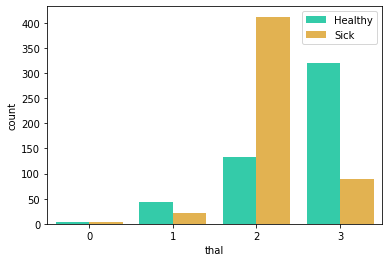

In [30]:
fig = sns.countplot(  x = 'thal', data = df,  hue = 'target',  palette = 'turbo'  )

plt.legend(  ['Healthy', 'Sick']  )

We can see many sick people have the kind 2 of Thalassemia.

# Step 4: Corrolations

Now that we analyzed all the factors, let's see if the corrolation heatmap gives us:

<AxesSubplot:>

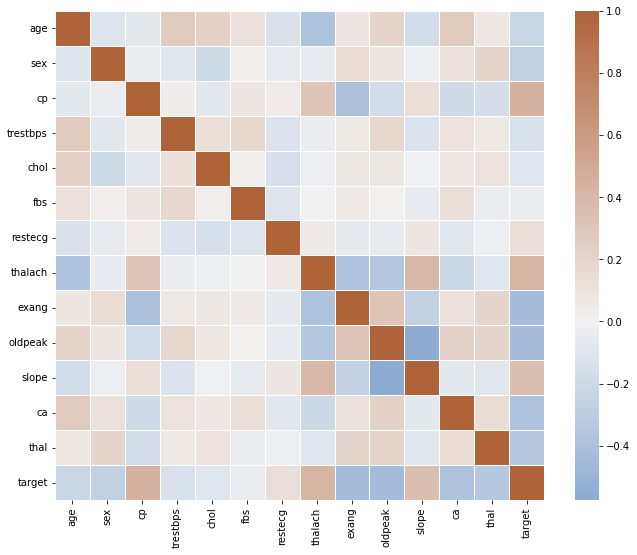

In [31]:
corr = df.corr()

plt.subplots( figsize = (11, 9) )

cmap = sns.diverging_palette( 250, 30,  as_cmap = True )

sns.heatmap( corr,  cmap = cmap,  center = 0,  square = True,   linewidths = .5  )

It is obvious that chest pain (cp), maximum heart rate achieved (thalach) and slope have a possitive corrolation with target, while exercise induced angina (exang), oldpeak, number of major vessels colored by flourosopy (ca) and thalasemia (thal) have a negative corrolation.